In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv("churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#Pre-processing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df = df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1)

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

scaler = MinMaxScaler()
cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "EstimatedSalary"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [13]:
from sklearn.model_selection import train_test_split 

X = df.drop(["Exited"], axis=1).to_numpy().astype(np.float32) # features
y = df["Exited"].to_numpy() # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(32, 16), random_state=1, max_iter=100)
clf.fit(X_train, y_train)


/Users/rinitjain/Documents/PICT-SEM7/LP3/ML/.venv/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(32, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,1


In [21]:
from sklearn.metrics import accuracy_score

pred_y = clf.predict(X_test)
print(f"Accuracy is {accuracy_score(y_test, pred_y)}")

Accuracy is 0.8623333333333333


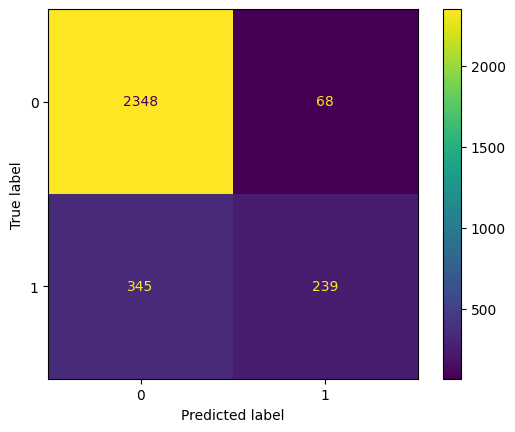

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()